### Import Relevant Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
sns.set()
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

#### Import Training and Test data

In [2]:
data_raw=pd.read_csv('train.csv')
test_raw=pd.read_csv('test.csv')
train=data_raw.copy()
test=test_raw.copy()
train.columns.values

array(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content',
       'Item_Visibility', 'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'], dtype=object)

In [3]:
train.describe(include='all')

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
count,8523,7060.000000,8523,8523.000000,8523,8523.000000,8523,8523.000000,6113,8523,8523,8523.000000
unique,1559,NaN,5,NaN,16,NaN,10,NaN,3,3,4,NaN
top,FDW13,NaN,Low Fat,NaN,Fruits and Vegetables,NaN,OUT027,NaN,Medium,Tier 3,Supermarket Type1,NaN
freq,10,NaN,5089,NaN,1232,NaN,935,NaN,2793,3350,5577,NaN
mean,NaN,12.857645,NaN,0.066132,NaN,140.992782,NaN,1997.831867,NaN,NaN,NaN,2181.288914
std,NaN,4.643456,NaN,0.051598,NaN,62.275067,NaN,8.371760,NaN,NaN,NaN,1706.499616
min,NaN,4.555000,NaN,0.000000,NaN,31.290000,NaN,1985.000000,NaN,NaN,NaN,33.290000
25%,NaN,8.773750,NaN,0.026989,NaN,93.826500,NaN,1987.000000,NaN,NaN,NaN,834.247400
50%,NaN,12.600000,NaN,0.053931,NaN,143.012800,NaN,1999.000000,NaN,NaN,NaN,1794.331000
75%,NaN,16.850000,NaN,0.094585,NaN,185.643700,NaN,2004.000000,NaN,NaN,NaN,3101.296400


#### Deal with missing values

In [4]:
#Check missing values
train.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [5]:
train['Item_Weight'].fillna(train["Item_Weight"].median(),inplace=True)
test['Item_Weight'].fillna(test["Item_Weight"].median(),inplace=True)
train['Outlet_Size'].fillna('Medium',inplace=True)
test['Outlet_Size'].fillna('Medium',inplace=True)
train['Item_Weight'].fillna(train['Item_Weight'].median(),inplace=True)
test['Item_Weight'].fillna(test['Item_Weight'].median(),inplace=True)

visibility_avg = train.pivot_table(values='Item_Visibility', index='Item_Identifier')
m=np.mean(visibility_avg['Item_Visibility'])
miss_bool = (train['Item_Visibility'] == 0)
train['Item_Visibility']=train['Item_Visibility'].replace({0:m})

visibility_avg1 = test.pivot_table(values='Item_Visibility', index='Item_Identifier')
m=np.mean(visibility_avg1['Item_Visibility'])
miss_bool = (test['Item_Visibility'] == 0)
test['Item_Visibility']=test['Item_Visibility'].replace({0:m})

In [6]:
train.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [7]:
train.tail()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,Medium,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976
8522,DRG01,14.800,Low Fat,0.044878,Soft Drinks,75.4670,OUT046,1997,Small,Tier 1,Supermarket Type1,765.6700


### Fix the names

In [8]:
train['Item_Fat_Content'].replace({'LF':'Low Fat','low fat':'Low Fat','reg':'Regular'},inplace=True)
train['Item_Fat_Content'].value_counts()
test['Item_Fat_Content'].replace({'LF':'Low Fat','low fat':'Low Fat','reg':'Regular'},inplace=True)

## EDA
##### Univariate Analysis
a.Catagorical Variables

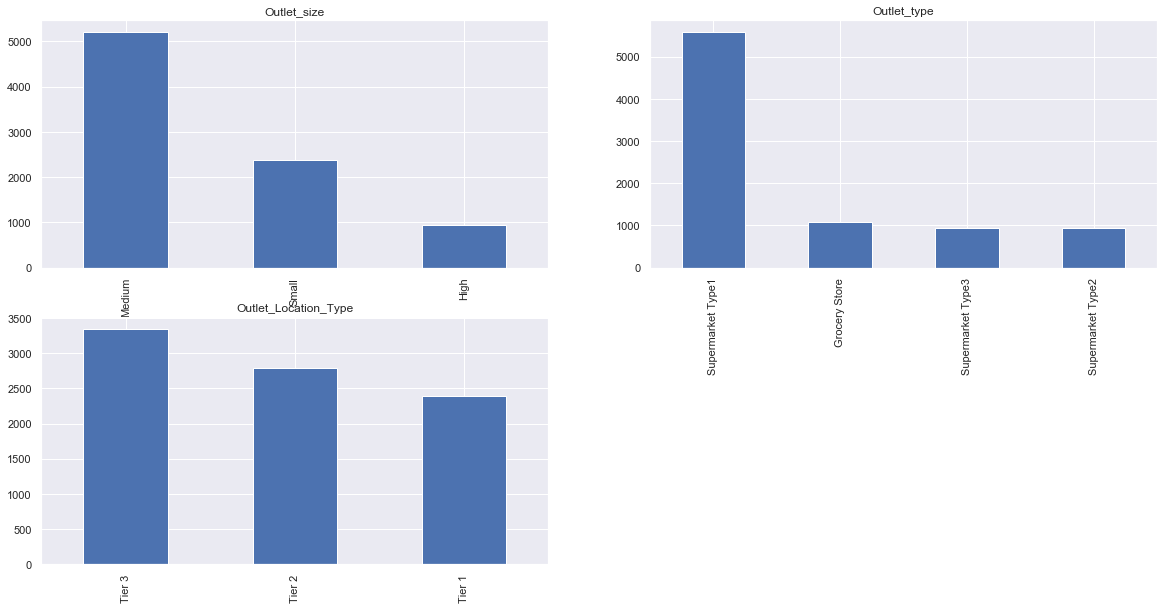

In [9]:
plt.figure(1)

plt.subplot(221) 
plt.title('Outlet_size')
train['Outlet_Size'].value_counts().plot.bar(figsize=(20,10))

plt.subplot(222)
plt.title('Outlet_type')
train['Outlet_Type'].value_counts().plot.bar(figsize=(20,10))

plt.subplot(223)
plt.title('Outlet_Location_Type')
train['Outlet_Location_Type'].value_counts().plot.bar(figsize=(20,10))

plt.show()


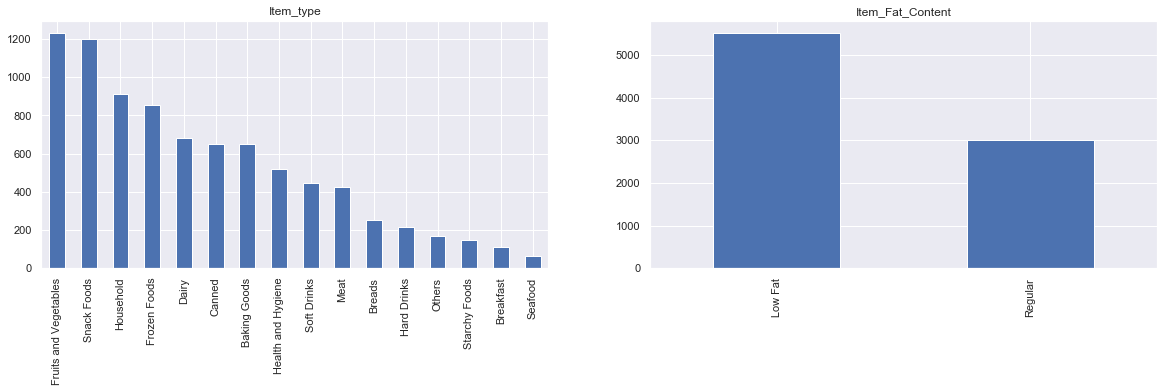

In [10]:
plt.figure(2)
plt.subplot(221)
plt.title('Item_type')
train['Item_Type'].value_counts().plot.bar(figsize=(20,10))

plt.subplot(222)
plt.title('Item_Fat_Content')
train['Item_Fat_Content'].value_counts().plot.bar(figsize=(20,10))

plt.show()

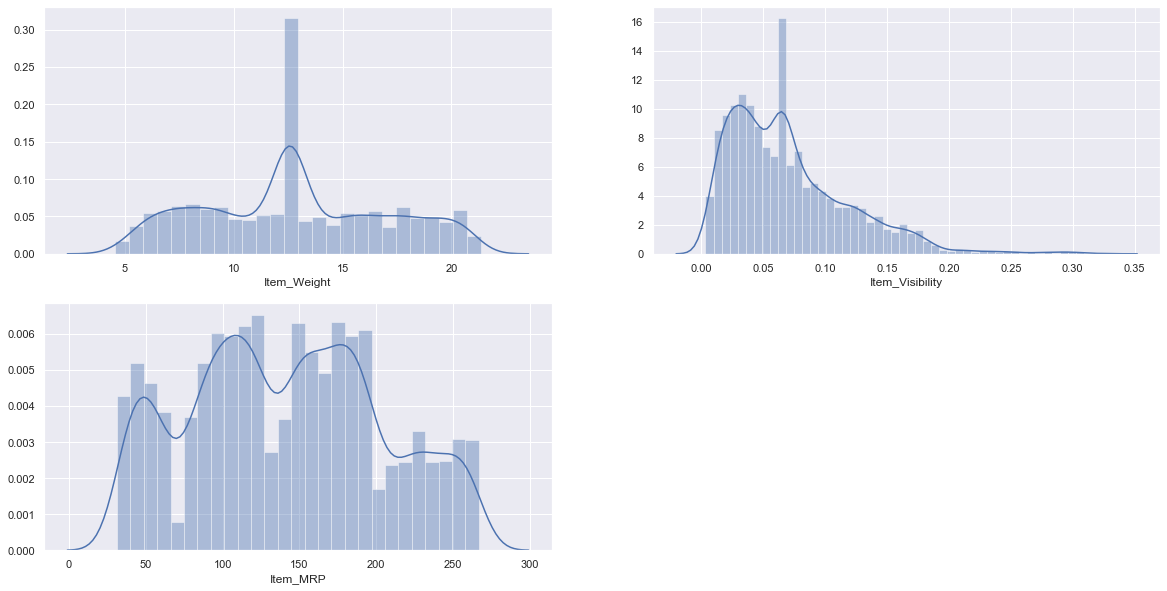

In [11]:
plt.figure(1,figsize=(20,10))
plt.subplot(221)
sns.distplot(train['Item_Weight'])

plt.subplot(222)
sns.distplot(train['Item_Visibility'])

plt.subplot(223)
sns.distplot(train['Item_MRP'])

plt.show()



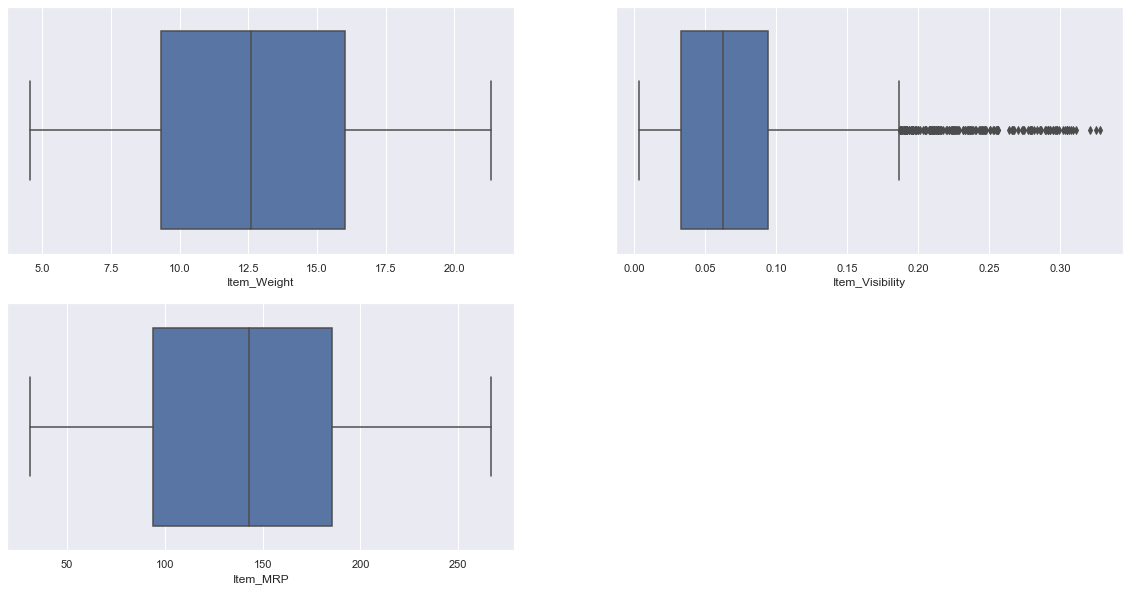

In [12]:
plt.figure(1,figsize=(20,10))
plt.subplot(221)
sns.boxplot(train['Item_Weight'])

plt.subplot(222)
sns.boxplot(train['Item_Visibility'])

plt.subplot(223)
sns.boxplot(train['Item_MRP'])

plt.show()



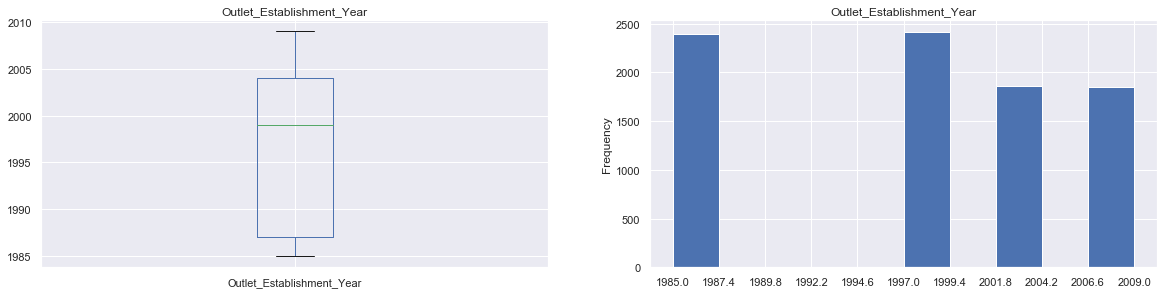

In [13]:
plt.figure(1,figsize=(20,10))

plt.subplot(224)
plt.title('Outlet_Establishment_Year')
count,bin_edges=np.histogram(train.Outlet_Establishment_Year)
train.Outlet_Establishment_Year.plot(kind='hist',xticks=bin_edges)

plt.subplot(223)
plt.title('Outlet_Establishment_Year')
train.Outlet_Establishment_Year.plot(kind='box')

In [14]:
train.describe(include='all')

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
count,8523,8523.00000,8523,8523.000000,8523,8523.000000,8523,8523.000000,8523,8523,8523,8523.000000
unique,1559,NaN,2,NaN,16,NaN,10,NaN,3,3,4,NaN
top,FDW13,NaN,Low Fat,NaN,Fruits and Vegetables,NaN,OUT027,NaN,Medium,Tier 3,Supermarket Type1,NaN
freq,10,NaN,5517,NaN,1232,NaN,935,NaN,5203,3350,5577,NaN
mean,NaN,12.81342,NaN,0.070186,NaN,140.992782,NaN,1997.831867,NaN,NaN,NaN,2181.288914
std,NaN,4.22724,NaN,0.048744,NaN,62.275067,NaN,8.371760,NaN,NaN,NaN,1706.499616
min,NaN,4.55500,NaN,0.003575,NaN,31.290000,NaN,1985.000000,NaN,NaN,NaN,33.290000
25%,NaN,9.31000,NaN,0.033085,NaN,93.826500,NaN,1987.000000,NaN,NaN,NaN,834.247400
50%,NaN,12.60000,NaN,0.062517,NaN,143.012800,NaN,1999.000000,NaN,NaN,NaN,1794.331000
75%,NaN,16.00000,NaN,0.094585,NaN,185.643700,NaN,2004.000000,NaN,NaN,NaN,3101.296400


#### Bivariate Analysis

Text(0, 0.5, 'Sales')

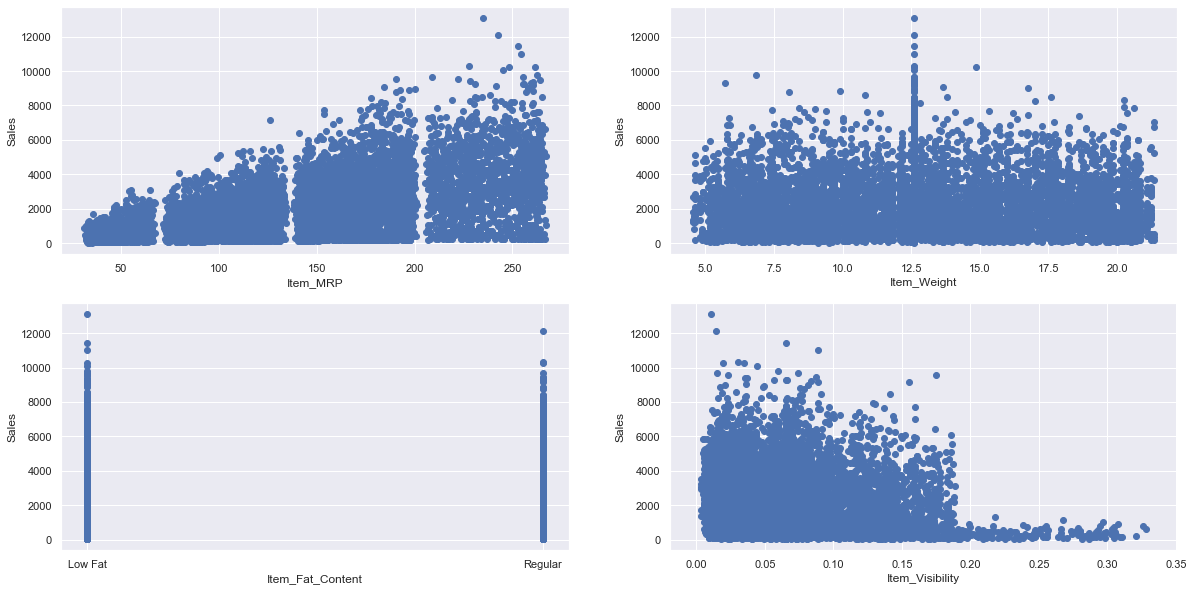

In [15]:
plt.figure(1,figsize=(20,10))
plt.subplot(2,2,1)
plt.scatter(train['Item_MRP'],train['Item_Outlet_Sales'])
plt.xlabel('Item_MRP')
plt.ylabel('Sales')

plt.subplot(2,2,2)
plt.scatter(train['Item_Weight'],train['Item_Outlet_Sales'])
plt.xlabel('Item_Weight')
plt.ylabel('Sales')

plt.subplot(2,2,3)
plt.scatter(train['Item_Fat_Content'],train['Item_Outlet_Sales'])
plt.xlabel('Item_Fat_Content')
plt.ylabel('Sales')

plt.subplot(2,2,4)
plt.scatter(train['Item_Visibility'],(train['Item_Outlet_Sales']))
plt.xlabel('Item_Visibility')
plt.ylabel('Sales')


Text(0, 0.5, 'Sales')

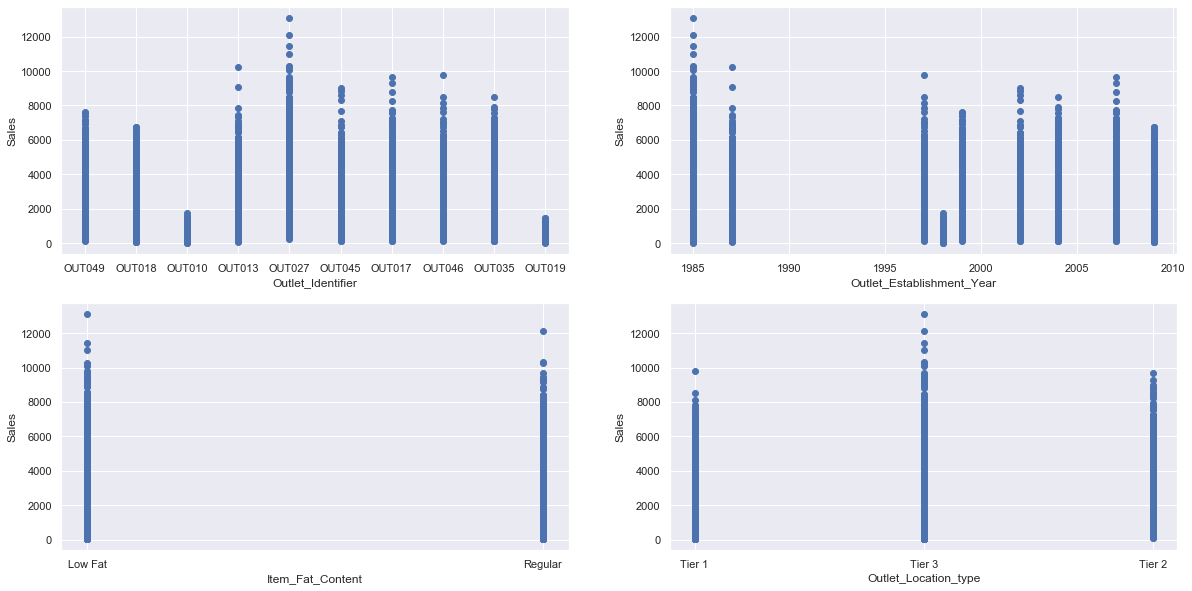

In [16]:
plt.figure(1,figsize=(20,10))

plt.subplot(2,2,1)
plt.scatter(train['Outlet_Identifier'],train['Item_Outlet_Sales'])
plt.xlabel('Outlet_Identifier')
plt.ylabel('Sales')

plt.subplot(2,2,2)
plt.scatter(train['Outlet_Establishment_Year'],train['Item_Outlet_Sales'])
plt.xlabel('Outlet_Establishment_Year')
plt.ylabel('Sales')

plt.subplot(2,2,3)
plt.scatter(train['Item_Fat_Content'],train['Item_Outlet_Sales'])
plt.xlabel('Item_Fat_Content')
plt.ylabel('Sales')

plt.subplot(2,2,4)
plt.scatter(train['Outlet_Location_Type'],train['Item_Outlet_Sales'])
plt.xlabel('Outlet_Location_type')
plt.ylabel('Sales')


Text(0, 0.5, 'Sales')

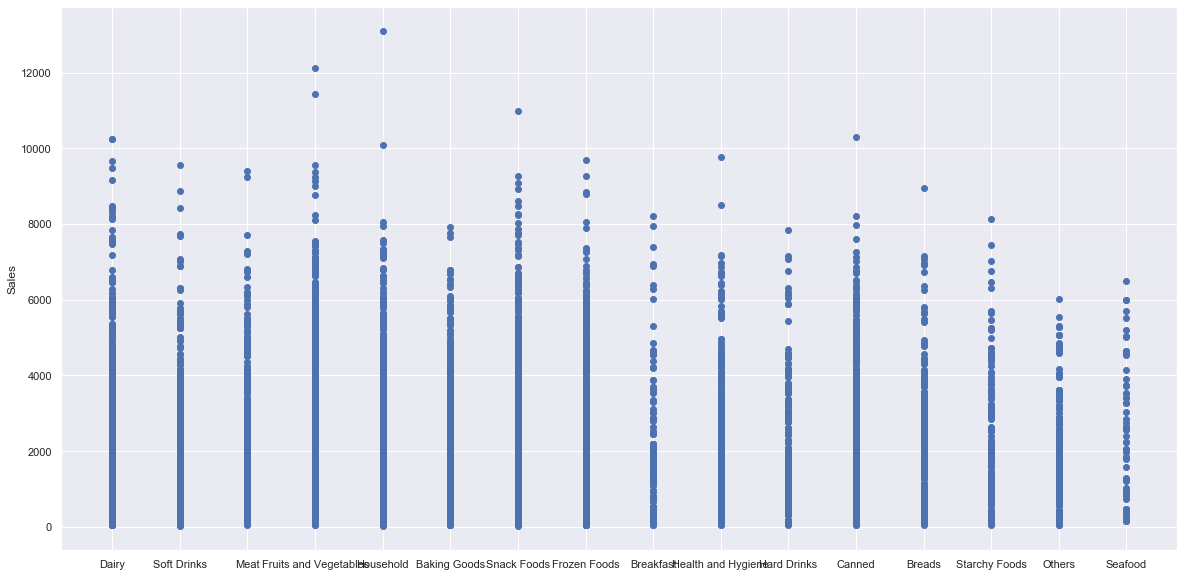

In [17]:
plt.figure(1,figsize=(20,10))
plt.scatter(train['Item_Type'],train['Item_Outlet_Sales'])
plt.ylabel('Sales')

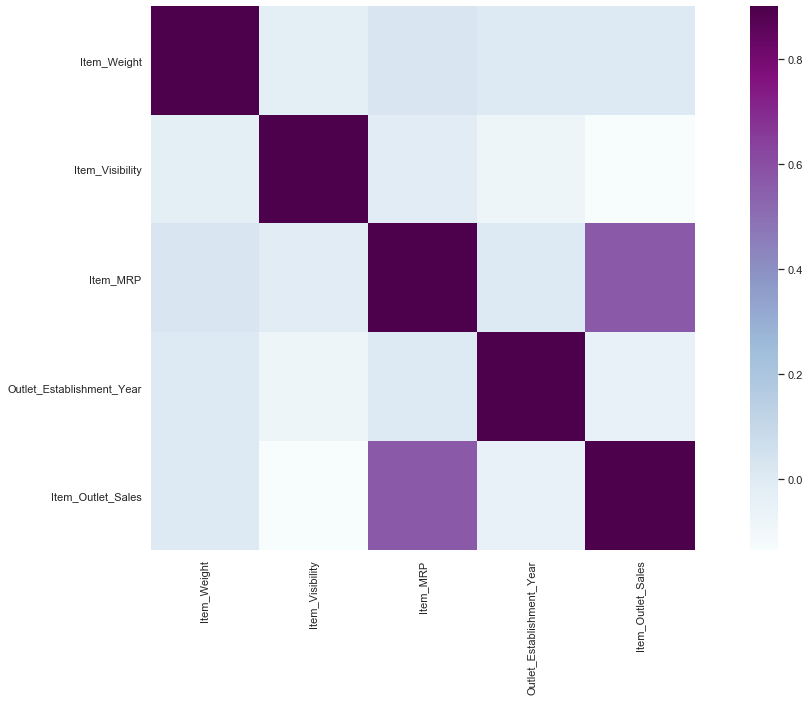

In [18]:
#Checking Correlation
matrix=train.corr()
ax=plt.subplots(figsize=(20,10))
sns.heatmap(matrix,vmax=.9,square=True,cmap='BuPu')

In [19]:
train2=data_raw.copy()

### Feature Selection

In [20]:
targets=train['Item_Outlet_Sales']
inputs=train.drop(columns={'Item_Outlet_Sales','Item_Identifier','Outlet_Establishment_Year','Item_Weight','Outlet_Type'},axis=1)
test1=test.copy()
test=test.drop(columns={'Item_Identifier','Outlet_Establishment_Year','Item_Weight','Outlet_Type'},axis=1)

In [21]:
X=pd.get_dummies(inputs,drop_first=True)
X_test=pd.get_dummies(test,drop_first=True)
y=targets

In [22]:
#Split training data into training and test set
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.10,random_state=42)



In [23]:
#Checkpoint
train_preprocessed=train.copy()
test_preprocessed=test.copy()

In [24]:
test1.columns.unique()

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')

In [25]:
test1.drop(columns={'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'},axis=1,inplace=True)

In [26]:
train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.00000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.81342,0.070186,140.992782,1997.831867,2181.288914
std,4.22724,0.048744,62.275067,8.371760,1706.499616
min,4.55500,0.003575,31.290000,1985.000000,33.290000
25%,9.31000,0.033085,93.826500,1987.000000,834.247400
50%,12.60000,0.062517,143.012800,1999.000000,1794.331000
75%,16.00000,0.094585,185.643700,2004.000000,3101.296400
max,21.35000,0.328391,266.888400,2009.000000,13086.964800


### Creating the Model

In [27]:
X, y = make_regression(n_features=31, n_informative=2,random_state=42, shuffle=True)
regr = RandomForestRegressor(max_depth=7, random_state=42)
regr.fit(x_train, y_train)
RandomForestRegressor(max_depth=7, random_state=42,verbose=2,criterion='rmse')

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='rmse',
                      max_depth=7, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=42, verbose=2, warm_start=False)

In [28]:
#Check accuracy
regr.score(x_train,y_train),regr.score(x_test,y_test)

(0.6324539030357514, 0.6107920336667677)

#### Make predictions on the assignment data and export

In [29]:
test_pred=regr.predict(X_test)
test1['Item_Outlet_Sales']=np.abs(test_pred)
test1.set_index('Item_Identifier',inplace=True)

In [30]:
test1.to_csv('sub.csv')